In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog

In [30]:
train_data = pd.read_csv('train.csv')

X = train_data.drop('label', axis=1).values
y = train_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image.reshape(28, 28), pixels_per_cell=(7, 7), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Извлечение HOG-признаков из обучающей и валидационной выборок
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)


In [32]:
#Стандартизируем признаки
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

In [ ]:
#Используем классификатора случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_hog, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred = clf.predict(X_test_hog)
accuracy_score(y_test, y_test_pred)

0.9638095238095238

In [35]:
# смотрим разницу факта и прогноза
result_clf = pd.DataFrame([np.array(y_test_pred), y_test_pred]).T
result_clf.columns = ['y_test', 'y_pred']
result_clf.head()

,y_test,y_pred
0,8,8
1,1,1
2,9,9
3,9,9
4,8,8


In [23]:
#Делаем аналогичное для тестового датасета
test_data = pd.read_csv('test.csv')
X_test = test_data.values

X_test_hog = extract_hog_features(X_test)
X_test_hog = scaler.transform(X_test_hog)

y_test_pred = clf.predict(X_test_hog)

submission = pd.DataFrame({'ImageId': np.arange(1, len(y_test_pred) + 1), 'Label': y_test_pred})
submission.to_csv('submission.csv', index=False)


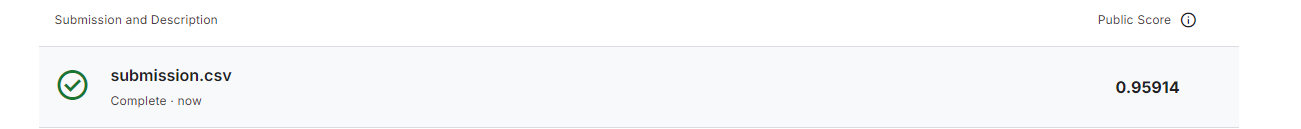